In [1]:
from qiskit_ibm_provider import IBMProvider
with open('../ibm_API_key','r') as file:
    token = file.readline()

provider = IBMProvider(token=token, instance="ibm-q-ncsu/nc-state/quantum-compiler")

In [2]:
n_4_t_1 = ["cna13m6m2pvg008sktx0",
"cna13nyyzmv0008w8t10",
"cna13q6m2pvg008sktxg",
"cna13rfj5tjg0080xg9g",
"cna13sz1m2c0008wypqg",
"cna13v7yzmv0008w8t1g"]

In [3]:
results = []
for job_id in n_4_t_1:
    results.append(provider.retrieve_job(job_id).result().get_counts())

In [54]:
def get_average_distributions(results):

    average_results = []

    for same_circuit_results in results:
        all_keys = set()
        for dist in same_circuit_results:
            all_keys = all_keys.union(set(dist.keys()))

        from collections import defaultdict

        def default_value():
            return 0

        average_dist = defaultdict(default_value)

        for key in all_keys:
            for i in range(len(same_circuit_results)):
                if key in same_circuit_results[i]:
                    average_dist[key] =  average_dist[key] + same_circuit_results[i][key]

            average_dist[key] = average_dist[key] // len(same_circuit_results)

        average_results.append(average_dist)

    return average_results

In [55]:
average_results = get_average_distributions(results)

In [80]:
top_75_dist_0_noise = dict(sorted(average_results[0].items(),key = lambda x: x[1], reverse=True)[:75])

In [148]:
key = list(top_75_dist_0_noise.keys())[15]

data_points = []
x = [1,1.47312,1.86022,2.24731,2.63441,3.02151]

for dist in average_results:
    data_points.append(dist[key])

key

'000000010000000000000001000'

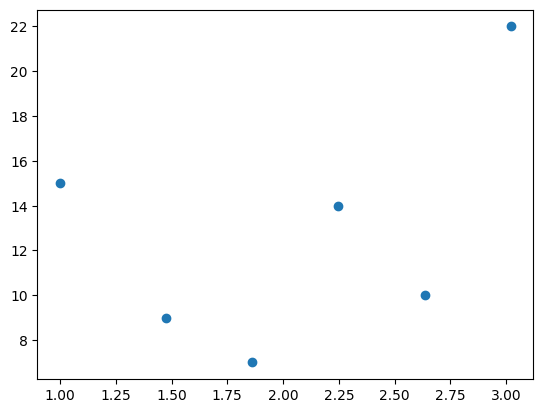

In [149]:
import matplotlib.pyplot as plt

plt.scatter(x,data_points)
plt.show()